In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("/content/customer_churn_dataset-training-master.csv")

In [ ]:
data.dtypes

,0
CustomerID,float64
Age,float64
Gender,object
Tenure,float64
Usage Frequency,float64
Support Calls,float64
Payment Delay,float64
Subscription Type,object
Contract Length,object
Total Spend,float64


In [ ]:
data.head(15)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [24]:
data.shape

(376137, 11)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376137 entries, 0 to 376137
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                376137 non-null  float64
 1   Gender             376137 non-null  object 
 2   Tenure             376137 non-null  float64
 3   Usage Frequency    376137 non-null  float64
 4   Support Calls      376137 non-null  float64
 5   Payment Delay      376137 non-null  float64
 6   Subscription Type  376137 non-null  object 
 7   Contract Length    376137 non-null  object 
 8   Total Spend        376137 non-null  float64
 9   Last Interaction   376137 non-null  float64
 10  Churn              376137 non-null  float64
dtypes: float64(8), object(3)
memory usage: 34.4+ MB


In [ ]:
data.isnull().sum()

,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [ ]:
null_values = data['CustomerID'].isnull()
filtered_df = data[null_values]
filtered_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
##dropping thw null row

data.dropna(inplace=True)
data.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [4]:
data.drop('CustomerID', axis=1, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440832.0,39.373153,12.442369,18.0,29.0,39.0,48.0,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.0,16.0,23.0,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.0,3.0,6.0,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.0,12.0,19.0,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.0,14.0,22.0,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.0,1.0,1.0,1.0


In [5]:
##Getting the highest subscription type of churned customer
churned_customers_df = data[data['Churn'] == 1][['Churn', 'Subscription Type']]
churned_customers_df

,Churn,Subscription Type
0,1.0,Standard
1,1.0,Basic
2,1.0,Basic
3,1.0,Standard
4,1.0,Basic
...,...,...
253688,1.0,Standard
253689,1.0,Standard
253690,1.0,Premium
253691,1.0,Premium


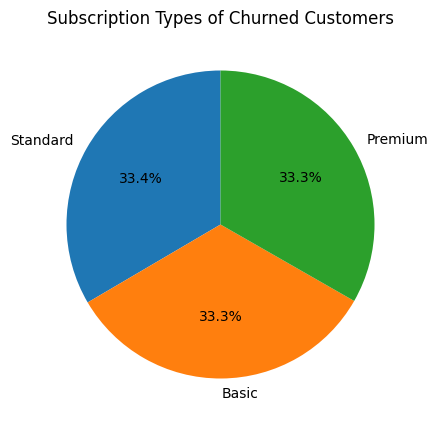

In [25]:
####Visualizing the highest subscription type of churned customer

subscription_counts = churned_customers_df['Subscription Type'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(subscription_counts, labels=subscription_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Subscription Types of Churned Customers')
plt.show()

In [6]:
##seperating the categorical columns from the numerical columns

X_data = data.drop('Churn', axis=1)
y_data = data['Churn']


numerical_colums = []
categorical_colums = []
for col in X_data.columns:
  if X_data[col].dtype == 'object':
    X_data[col] = X_data[col].astype('category')
    categorical_colums.append(col)
  else:
    numerical_colums.append(col)

In [ ]:
churn_counts = y_data.value_counts()
print(churn_counts)

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64


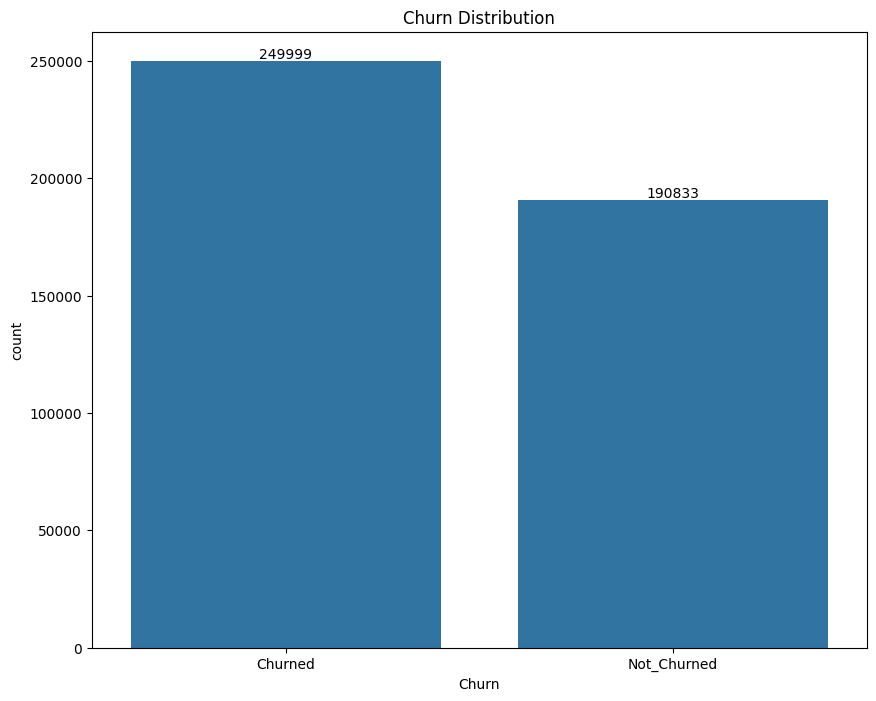

In [ ]:
##Looking at the number of customers that have churned compared to those that have not churned
#I did this to check if the daset is significantly balanced or not so as to determine an optimization technque will be needed to balance it

plt.figure(figsize=(10, 8))
sns.countplot(x=y_data.map({0: 'Not_Churned', 1: 'Churned'}))
counts = [int(b.get_height()) for b in plt.gca().containers[0]]
plt.bar_label(plt.gca().containers[0], counts)
plt.title('Churn Distribution')
plt.show()



In [ ]:
# Calculate the ratio of the majority class to the minority class

imbalance_ratio = churn_counts[0] / churn_counts[1]
print("Imbalance ratio:", imbalance_ratio)



Imbalance ratio: 0.7633350533402133


In [ ]:
#plotting the numerical columns

data_numerical = X_data[numerical_colums]
data_numerical.corr()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
Age,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980
Tenure,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903
Usage Frequency,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662
Support Calls,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684
Payment Delay,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708
Total Spend,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890
Last Interaction,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000


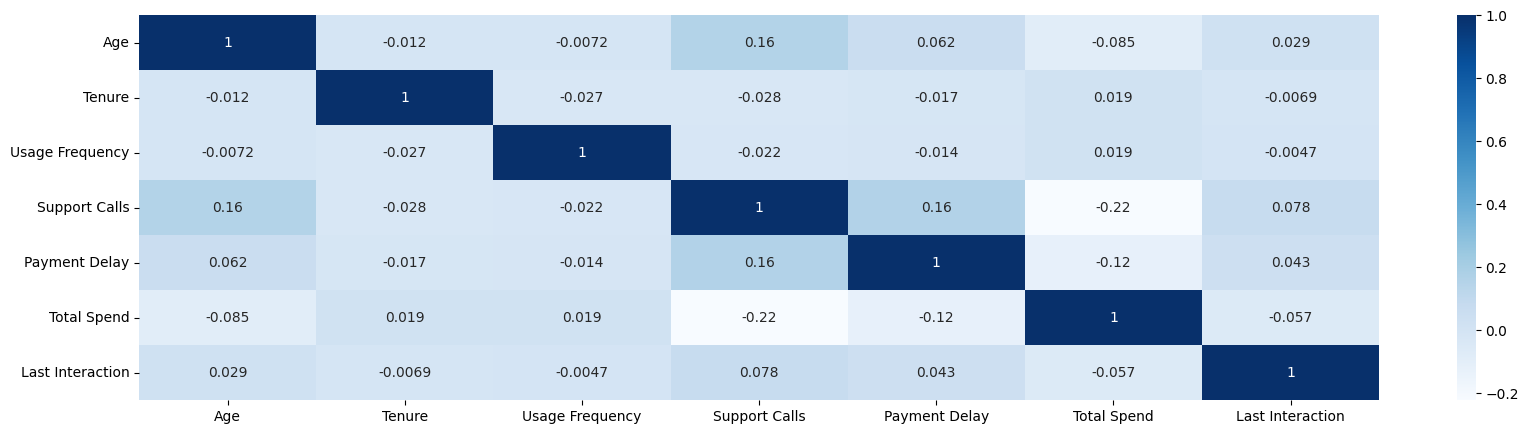

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(data_numerical.corr(),annot=True, cmap="Blues")
plt.show()

In [ ]:
##seperating the numerical columns from the objects columns.
##But this time, with churn, to understand the correlation between churn and the x variables

numerical_colums = []
for col in data.columns:
  if data[col].dtype != 'object':
    numerical_colums.append(col)
  else:
    pass

In [ ]:
numerical_colums

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction',
 'Churn']

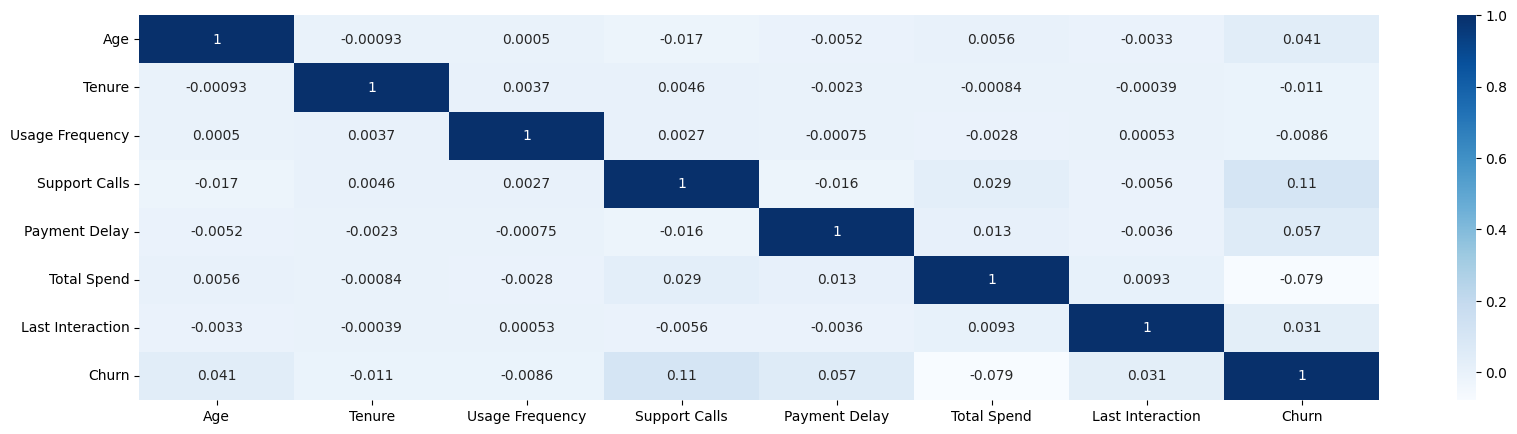

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(data[numerical_colums].corr(),annot=True, cmap="Blues")
plt.show()

## Pipeline  

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_colums),
    ('cat', categorical_pipeline, categorical_colums)
])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

## ML Model

In [9]:
##Importing model, fitting it into the pipeline and fitting the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])

rf_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Tenure',
                                                   'Usage Frequency',
                                                   'Support Calls',
                                                   'Payment Delay',
                                                   'Total Spend',
                                                   'Last Interaction']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Subscription Type',
                                                   'Contract Length'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Geting feature names from the preprocessor & Creating a dataFrame to display feature importances
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

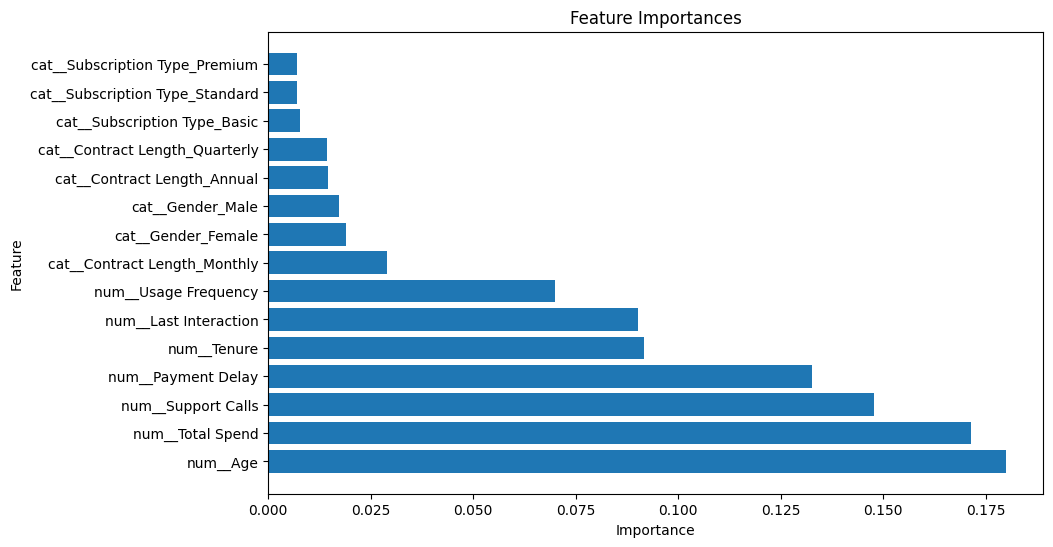

In [ ]:
## Plotting out the most important features

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [10]:
##testing the efficiency of the model on the test data

y_pred = rf_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_pred, Y_test)
print(f"Accuracy: {test_accuracy}")

Accuracy: 0.9990296166321051


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38134
         1.0       1.00      1.00      1.00     50033

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



##Hyper-parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'classifier__n_estimators': [50, 100,150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=5)

rf_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Tenure',
                                                                          'Usage '
                                                                          'Frequency',
                                                                          'Support '
                                                                          'Calls',
                                                                          'Payment '
                                                                          'Delay',
                                                                          'Total '
                                                                          'Spend',
                                                                          'Last '
                                                                          'Interaction']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Subscription '
                                                                          'Type',
                                                                          'Contract '
                                                                          'Length',
                                                                          'Gender',
                                                                          'Subscription '
                                                                          'Type',
                                                                          'Contract '
                                                                          'Length'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]})

In [ ]:
##the best parameters
rf_grid_search.best_params_

{'classifier__max_depth': None,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 150}

In [ ]:
rf_grid_search.best_score_

0.9983100109168758

In [13]:
#saving & loading the model

import pickle
filename = 'trained_model.sav'
pickle.dump(rf_pipeline, open(filename, 'wb'))

loaded_model = pickle.load(open('trained_model.sav', 'rb'))